# Introduction

## Cells

This is a notebook, it is comprised of cells, which can be code, markdown or output cells. This cell is a markdown cell and can be used for descriptions, summaries etc. A cell can be selected by clicking on it, and its type can be altered by using the drop down box in the above toolbar. If you change a cell it will revert to its original code, it can be executed by using ctrl+enter.

## Markdown

If you double click on this cell, you will see that it contains more than just text. For instance the headings are defined by the use of series of #'s before them. Once you execute a markdown cell by using ctrl+enter it will compute the markdown language and translate the headings lines into their proper definitions.

Markdown can be heavily customised but it will require a knowledge of yaml. Luckily there are easier ways, which will be touched on in the next section. By defualt the markdown cells in Jupyter notebooks also contain the ability to insert equations, headings and images, as shown below.

## Images

In markdown cells, an image can be displayed using markdown or through HTML. Below is an example image that displays an image using markdown via hyperlink.

![](https://assets.pokemon.com/assets/cms2/img/pokedex/full/151.png)

Unfortunately the image is too large and cumbersome when displayed like this. The easiest fix to overcome this is by using HTML, like below.

<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/151.png" width="200"/>

You can double click on the cell to see the difference in the lines that produce the images. HTML is a versatile language that can add zass to your notebooks in a variety of ways. There are an excessively large amount of tutorials that cover HTML. However it is only ever used in notebooks and generator type architectural designs, which translates to: don't bother learning it, just google what you need when you do need it.

For instance if it bothers you that the image is not aligned to the left, it is best to search the HTML image tag and review its attributes. The site https://www.w3schools.com/html/default.asp is a good go to, with everything laid out in an easily intrepretable manner.

<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/151.png" width="200" style="float:left">

## Useful customisations

Some notable tags that you will want to become familiar with are:

<b>Bold text</b>

<s>strike through </s>

<u>underline</u>
 
<i>italic<i>
    
<p style="color:red">colour</p>
    
<p style="color:#bf00ff">custom colours</p>
    
Notably HTML is a powerful language allowing you to add a wide variety of different things to your notebooks including buttons:
    
<button type="button">Click Me!</button>

You can essentially create an entire web app inside of this notebook, which can be useful for interactive presentations or the generation of reports. As the notebooks also operate using YAML, they can utilise any other markdown language of your preference and come with LateX included, for example:
    
$$
\text{A geometric sequence is defined for any } 0 < r < 1, a \in \mathbb{R} \text{, as:}\\
\sum_{n=0}^{\infty}ar^{n}
$$

## R

A notebook can use python or R. This one has been setup with R code in its cells and will note work correctly unless you are using an R kernel.

It is important to remember that cells are not independant of each other, so it is important to write your code in a manner that does not reuse variables or depend on a different cell. An example of a code cell is given below:

In [6]:
x <- 0

The above cell defines a new variable x and pipes in a value of 0 to the variable. Notice that next to the cell it says
"In []:"
This indicates that it is an input cell and has been run a number of times equal to the number in the square brackets.

Below we add a number to x

In [16]:
x <- x + 1

Below is how we print out the value of x.

Not that there are two different print functions cat() and print().

In this example we use cat() as it prints a list of things, which in this case is the string: "the value of x is:" and x.

Although these are trivial examples of using R, it is important to see how the three different cells interact. You will find that most problems with your code in a notebook will be due to variable interaction. That is you have accidentally named a variable the same name or are using a function that is effecting another cells function.

Importantly if you are not sure why your notebook is not working correctly, you can reset the kernal under the kernal drop down menu at the top. Sometimes the notebooks kernal will have issues and will just need to be reset.

In [17]:
cat('The value of x is:', x)

The value of x is: 2

# Graphing

This next section will go over the code I am using in an statistics assignment. The idea is that it will show the code used for some preliminary investigations and some graphs. We will cover multiple graphs in one pane, colours, different poitns etc. I will also leave in some sections to show how I have used some of the above markdown techniques within the report to make it more fluid.

The first question is about the properties of a time series constructed from $x_{t}$ for a given discrete time point $t$, defined by:

[//]: # "Just like in code we can use comments in markdown. Here I combine both HTML tags and LateX markdown to highlight parts of the equation. It is messy in the code so comments can make it easier to interpret, for instance the entire equation line is actually:"
[//]: # "x_{t}=u_{1}sin(2\pi v_{0}t)+u_{2}cos(2\pi v_{0})"

$$ x_{t}=\color{red}{u_{1}}sin(2\pi \color{green}{v_{0}}t)+\color{blue}{u_{2}}cos(2\pi \color{green}{v_{0}}t) $$

Where $\color{red}{u_{1}}$ and $\color{blue}{u_{2}}$ are independent random variables with zero means and:

$$E(\color{red}{\mu_{1}^{2}})=E(\color{blue}{\mu_{1}^{2}})=\sigma^{2}$$

and that the value $\color{green}{v_{0}}$ is a constant that determines the period or time it takes for the process to make one complete cycle.

The first thing we will do define the function so that we can have a look at it!

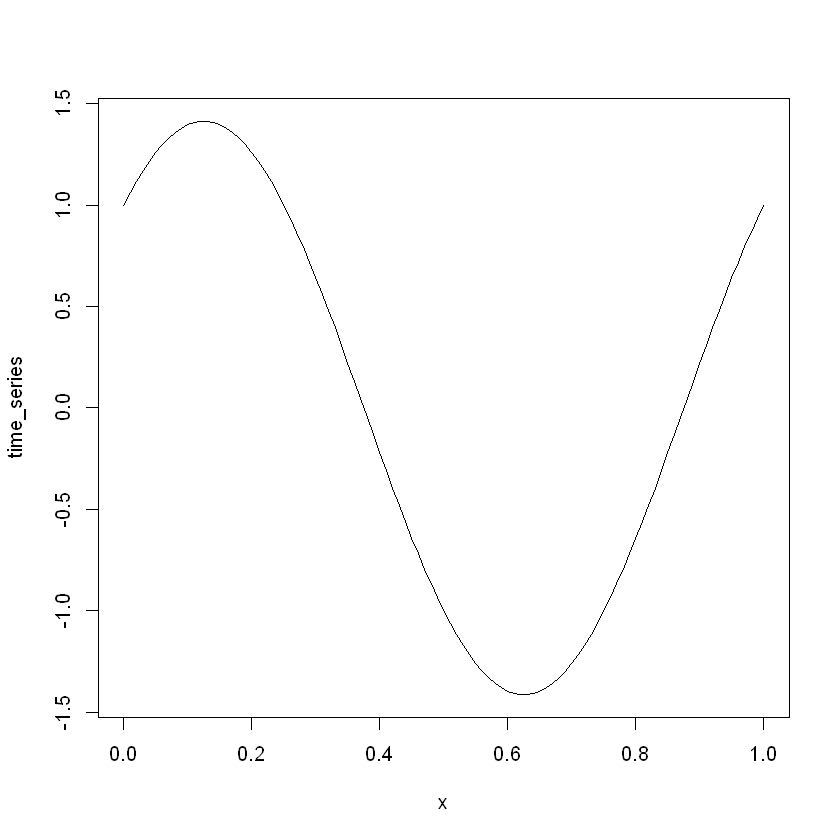

In [172]:
# a few defined varaibles first:
u1 <- 1
u2 <- 1
v0 <- 1

# we can use these to define a function of a line
time_series <- function(t){u1*sin(2*pi*v0*t)+u2*cos(2*pi*v0*t)}

# and we can use the basic plot function to have a quick look!
plot(time_series)

The default plot tool is not the greatest, lets spice it up a bit using a well known collection of packages called tidyverse.

In [173]:
# If you do not have tidyverse installed you can install it by using this cell.
# Note that the input cell will have a * in the square brackets if it is currently running.
install.packages('tidyverse')

Warning message:
"package 'tidyverse' is in use and will not be installed"


In [174]:
# First we will enable the plotting library using the command:
library(ggplot2)

# Unfortunately ggplot does not support out of the box plotting for a function. So first we have to define a new plot:
new_plot <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))


The above line pipes a plot into new_plot with an empty dataset, and an aesthetic mapping of x onto itself.
In other words an empty dataset that has a variable x.

to plot the function we can simply add it to the plot like so:
>p + stat_function(fun = time_series)

However we will need to define the limits of the plot using
>xlim(0,5)


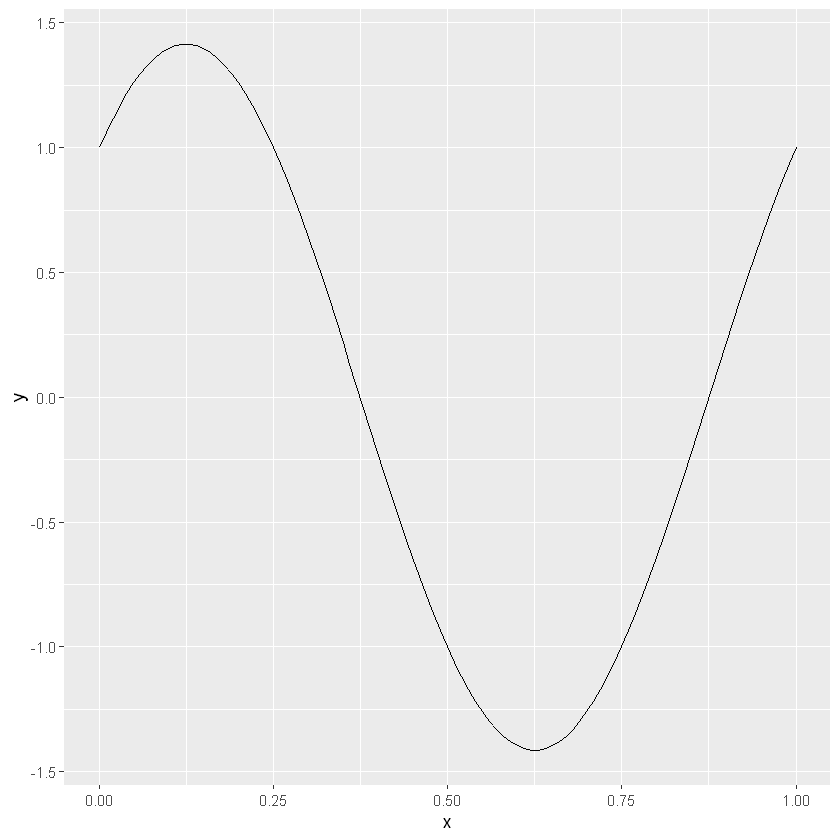

In [175]:
# to do this we can just add the two together:
new_plot + stat_function(fun = time_series) + xlim(0,1)

It does look different but unfortunately it still looks terrible. So lets use the spicey attributes that ggplot2 has to offer!

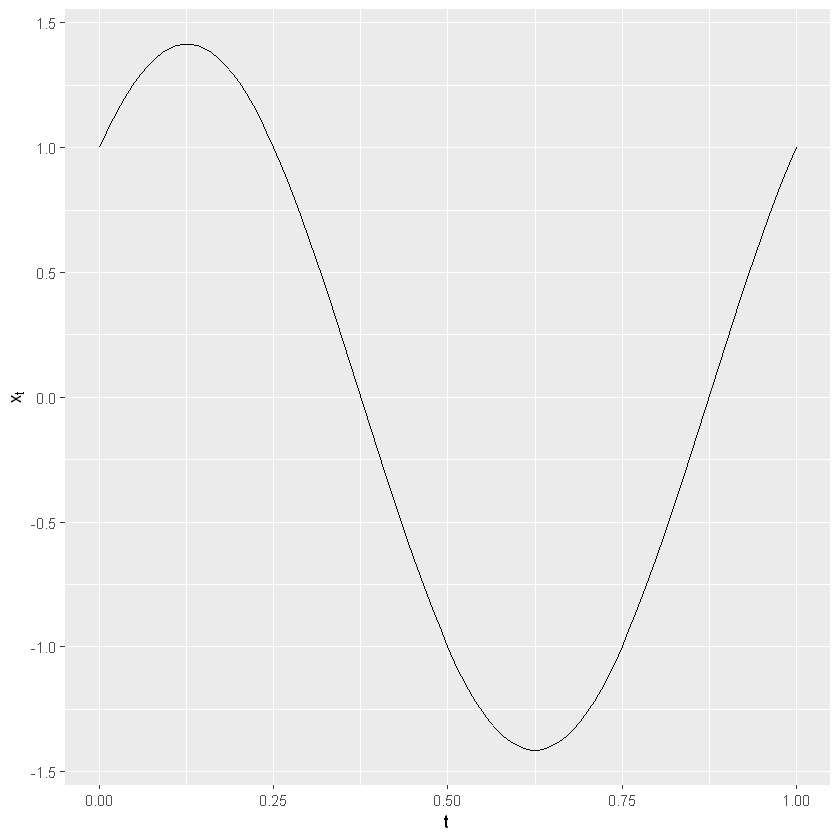

In [176]:
# we can define the previous function as its own variable so that things are easier to read:
a_plot <- new_plot + stat_function(fun = time_series) + xlim(0,1)

# Lets start by adding an x axis
a_plot <- a_plot + xlab('t')

# and a y axis
# although the y variable needs to use Latex as it has subscript...
# here we can use expression, although the syntax is slightly different to actual LateX:
y_label <- expression(x[t])

# now lets add the y label:
a_plot <- a_plot + ylab(y_label)

a_plot

The font size of the labels are too small and the graph needs a title!

It would make sense that the title should be the equation... However that is a mess of different notations and garbage that will be hard to do...

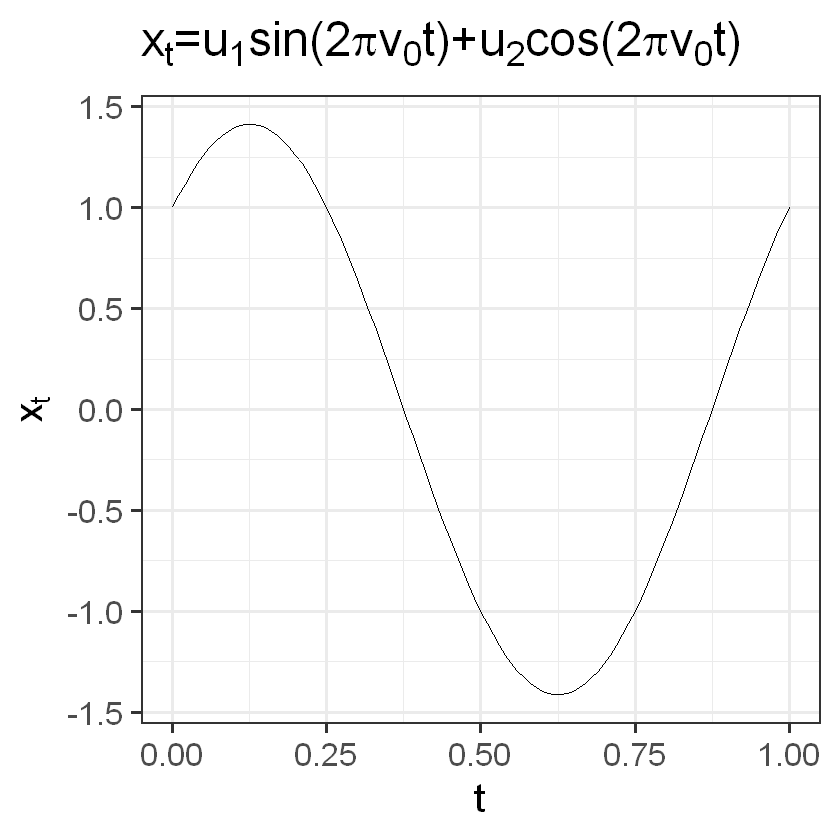

In [177]:
# Lets reset the function
a_plot <- new_plot + stat_function(fun = time_series) + xlim(0,1)

# add the x axis
a_plot <- a_plot + xlab('t')

# and a y axis
y_label <- expression(x[t])
a_plot <- a_plot + ylab(y_label)

# For the complicated title we will have to chop up the expression into a list.
# we also have to use the paste function otherwise it will only select the first element.
# This is a common work around in R.
my_title <- expression(paste(x[t], "=", u[1], "sin(2", pi, v[0], "t)+", u[2], "cos(2", pi, v[0], "t)"))

a_plot <- a_plot + ggtitle(my_title, )

# We can also add a theme to spice it up, here we can also use the base_size argument to change the font size:
a_plot <- a_plot + theme_bw(base_size = 24)

# finally plot it by calling it.
a_plot

Amazingly it still looks like garbage!

Be careful that you don't become to tied up in details. It takes one line of code to actually produce the graph then several hours of dicking around to make it look good.

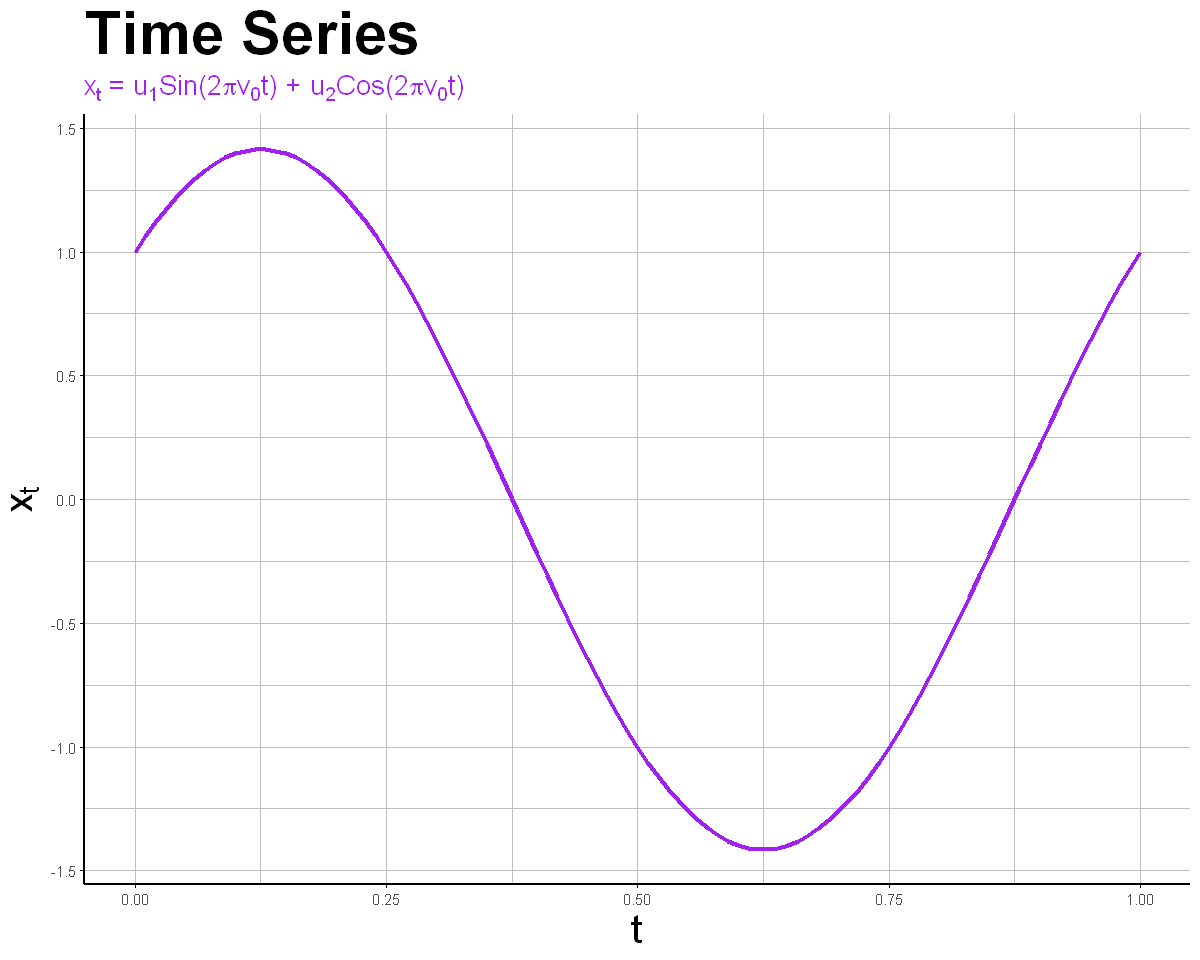

In [241]:
# Create the plot
new_plot <- ggplot(data = data.frame(x = 0), mapping = aes(x = x))
new_plot <- new_plot + stat_function(fun = time_series, color="purple", size=1.25) + xlim(0,1)

# axes labels:
new_plot <- new_plot + xlab('t') + ylab(expression(x[t]))

# we can add a caption, subtitle etc using labs:
new_plot <- new_plot + labs(
                                xlab='t',
                                ylab=expression(x[t]),
                                title='Time Series',
                                subtitle=expression(paste(x[t], " = ", u[1], "Sin(2", pi, v[0], "t) + ", u[2], "Cos(2", pi, v[0], "t)"))
                             )

# Lets make up theme this time, for reference:
# https://ggplot2.tidyverse.org/reference/theme.html

new_plot <- new_plot + theme(
                                plot.title = element_text(size = 36, face = "bold"),
                                plot.subtitle = element_text( size = 16, color = "purple"),
                                axis.title.y = element_text(size = 24),
                                axis.title.x = element_text(size = 24),
                                panel.background = element_rect(fill = "white"),
                                panel.grid = element_line(color = "grey"),
                                axis.line = element_line(size=0.75),
                                axis.ticks = element_line(color="black")
                              )

#We can also change the height and width in the options via:
options(repr.plot.width=10, repr.plot.height=8)

# finally plot it by calling it.
new_plot

options(repr.plot.width=7, repr.plot.height=7)


What was it that we wanted to show again anyway?

It was actually to graph the variation of the wave given the two variables $\color{red}{u_1}$ and $\color{blue}{u_{2}}$ and the constant $\color{green}{v_{0}}$

A quick look at $\color{green}{v_{0}}$, we can demonstrate how it will elongate the wave:

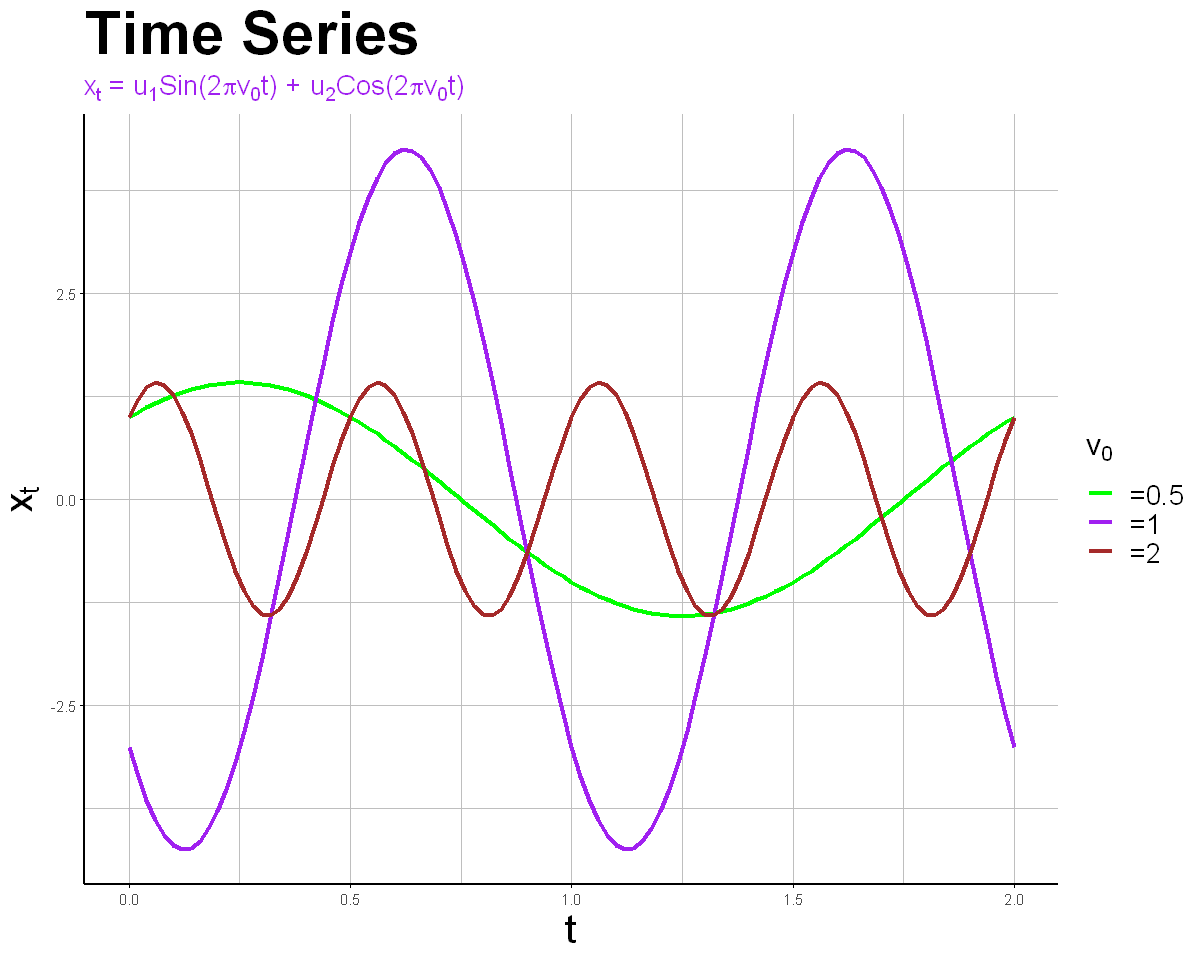

In [463]:
# We will make two other series that show a high and lower value for v0
# Rermembering that v0 is 1 in the above graphs

# v0 = 1/2
lower <- function(t){sin(2*pi*0.5*t)+cos(2*pi*0.5*t)}
# v0 = 2
higher <- function(t){sin(2*pi*2*t)+cos(2*pi*2*t)}

# We do all the same things as before, lets also make it easier to read by using white spaces:
new_plot <- ggplot(data = data.frame(x = 0), mapping = aes(x = x)) +
            # Here we add the lower function
            stat_function(fun = lower, size=1.25, aes(color="=0.5")) + 
            # Here we add the original function
            stat_function(fun = time_series, size=1.25, aes(color="=1")) +
            # Here we add the higher function
            stat_function(fun = higher, size=1.25, aes(color="=2")) + 
            xlab('t') + ylab(expression(x[t])) +
            labs(
                xlab='t',
                ylab=expression(x[t]),
                title='Time Series',
                subtitle=expression(paste(x[t], " = ", u[1], "Sin(2", pi, v[0], "t) + ", u[2], "Cos(2", pi, v[0], "t)"))
            ) +
            theme(
                plot.title = element_text(size = 36, face = "bold"),
                plot.subtitle = element_text( size = 16, color = "purple"),
                axis.title.y = element_text(size = 24),
                axis.title.x = element_text(size = 24),
                panel.background = element_rect(fill = "white"),
                panel.grid = element_line(color = "grey"),
                axis.line = element_line(size=0.75),
                axis.ticks = element_line(color="black"),
                # Some more theme elements are added for the legend.
                legend.key = element_rect(fill = "white", color = NA),
                legend.title = element_text(size = 18),
                legend.text = element_text(size = 16)
            ) +
            # We change the xlim() to double as we have multiplied the function by 2.
            xlim(0,2) + 
            # We add a legend as well because there a re more than one function:
            scale_colour_manual(expression(v[0]), values = c("green", "purple", "brown"))

options(repr.plot.width=10, repr.plot.height=8)

# finally plot it by calling it.
new_plot

options(repr.plot.width=7, repr.plot.height=7)

Here we can see that increasing $v_{0}$ compacts the wave so that its period is more frequent. Decreasing $v_{0}$ does the opposite, making the length of a phase longer, as though someone has pulled on it stretching it out.

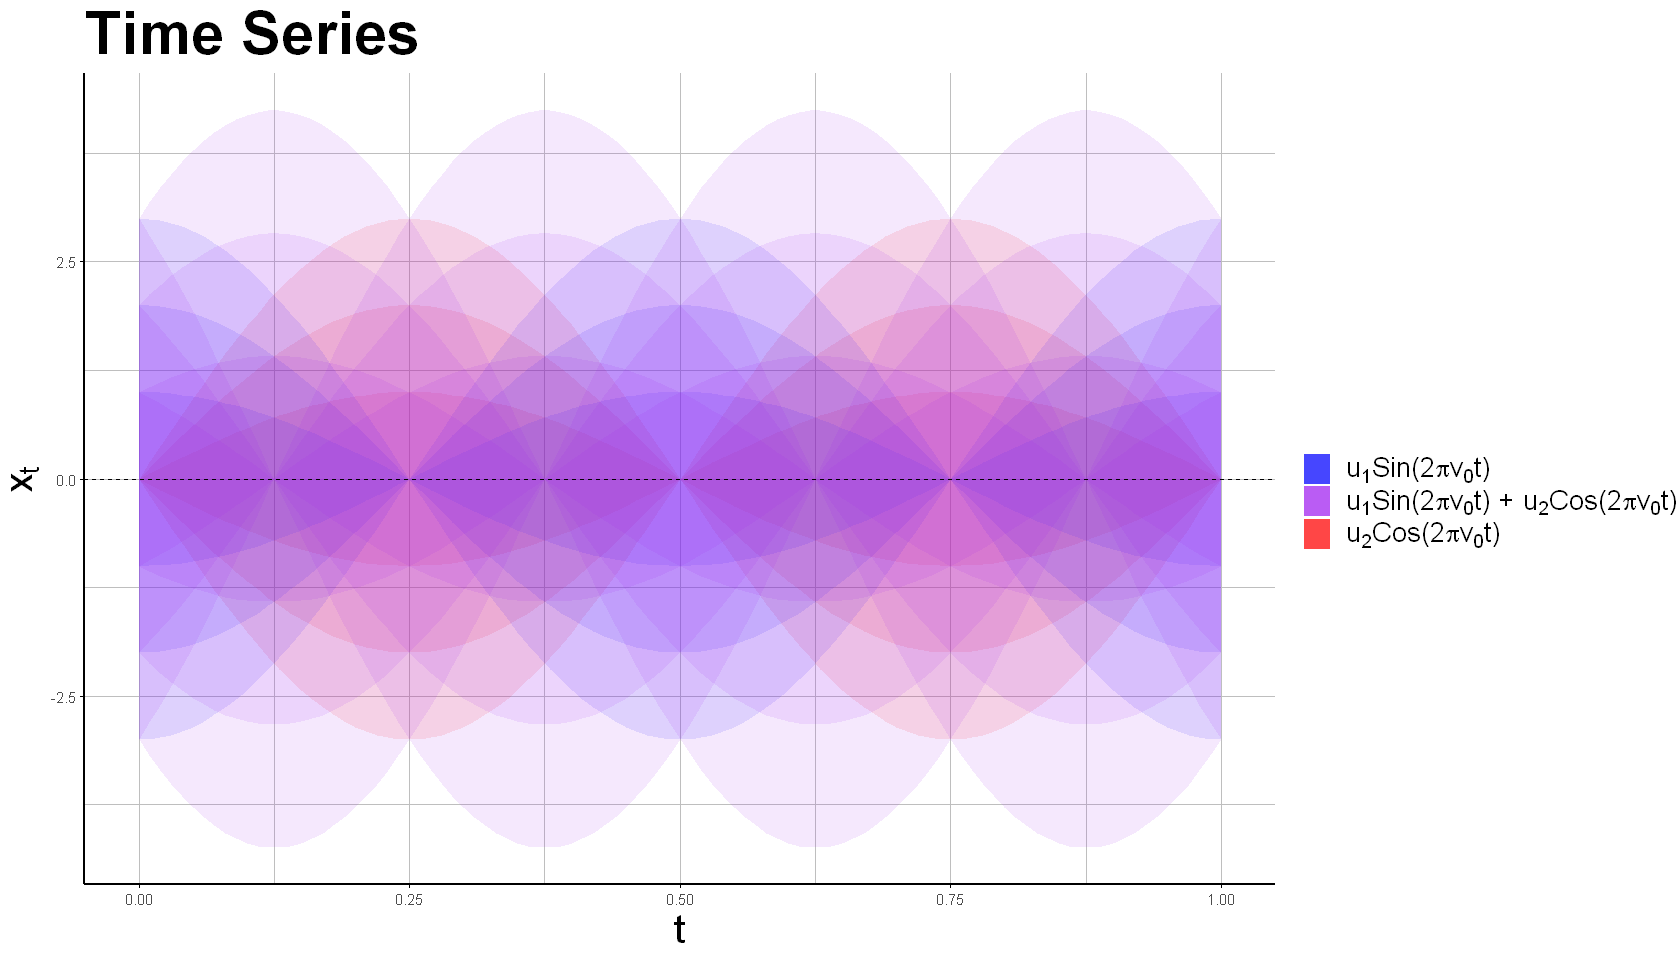

In [528]:
# There is a strange enigma in R, that you need to have data whether it is a function or not.
# So far you have seen a function work without a dataset which is the exception to the rule
# So we will create some dummy data to plot to, below is just a sequence of data from 0 to 1 at every 0.1 points
some_data <- data.frame(x = seq(0, 1, 0.01))

# we will have to define the new time series boundaries
# lets divide up the sin and the cosine elements separately.
sin_fun <- sapply(some_data$x, FUN=function(t){sin(2*pi*t)})
cos_fun <- sapply(some_data$x, FUN=function(t){cos(2*pi*t)})
# Here is the mean
wave.mean <- data.frame( x = c(-Inf, Inf), y = 0, wave.mean = factor(50))

sin.and.cosin <- expression(paste(u[1], "Sin(2", pi, v[0], "t) + ", u[2], "Cos(2", pi, v[0], "t)"))
sin.label <- expression(paste(u[1], "Sin(2", pi, v[0], "t)"))
cosin.label <- expression(paste(u[2], "Cos(2", pi, v[0], "t)"))

# We can also make the graph bigger again!
options(repr.plot.width=14, repr.plot.height=8)

ggplot(data = some_data, mapping = aes(x = x)) + 
    # Sin function on its own    
    geom_ribbon(aes(ymin = -sin_fun, ymax = sin_fun, fill = "red"), alpha = .1) +
    geom_ribbon(aes(ymin = -2*sin_fun, ymax = 2*sin_fun, fill = "red"), alpha = .1) +
    geom_ribbon(aes(ymin = -3*sin_fun, ymax = 3*sin_fun, fill = "red"), alpha = .1) +
    # Cos function on its own
    geom_ribbon(aes(ymin = -cos_fun, ymax = cos_fun, fill = "blue"), alpha = .1) +
    geom_ribbon(aes(ymin = -2*cos_fun, ymax = 2*cos_fun, fill = "blue"), alpha = .1) +
    geom_ribbon(aes(ymin = -3*cos_fun, ymax = 3*cos_fun, fill = "blue"), alpha = .1) +
    # sin + cos functions
    geom_ribbon(aes(ymin = -(sin_fun+cos_fun), ymax = (sin_fun+cos_fun), fill = "purple"), alpha = .1) +
    geom_ribbon(aes(ymin = -2*(sin_fun+cos_fun), ymax = 2*(sin_fun+cos_fun), fill = "purple"), alpha = .1) +
    geom_ribbon(aes(ymin = -3*(sin_fun+cos_fun), ymax = 3*(sin_fun+cos_fun), fill = "purple"), alpha = .1) +
    # Sin - cos functions
    geom_ribbon(aes(ymin = -(sin_fun-cos_fun), ymax = (sin_fun-cos_fun), fill = "purple"), alpha = .1) +
    geom_ribbon(aes(ymin = -2*(sin_fun-cos_fun), ymax = 2*(sin_fun-cos_fun), fill = "purple"), alpha = .1) +
    geom_ribbon(aes(ymin = -3*(sin_fun-cos_fun), ymax = 3*(sin_fun-cos_fun), fill = "purple"), alpha = .1) +
    # Lets also add a small line for the average
    geom_hline(yintercept = 0, linetype = "dashed") +
    # We can also add the same stuff as before!
    xlim(0,1) +
    scale_fill_identity(name = '', guide = 'legend',labels = c(sin.label, sin.and.cosin, cosin.label)) +
    theme(
        plot.title = element_text(size = 36, face = "bold"),
        plot.subtitle = element_text( size = 16, color = "purple"),
        axis.title.y = element_text(size = 24),
        axis.title.x = element_text(size = 24),
        panel.background = element_rect(fill = "white"),
        panel.grid = element_line(color = "grey"),
        axis.line = element_line(size=0.75),
        axis.ticks = element_line(color="black"),
        legend.key = element_rect(fill = "white"),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 16),
        legend.text.align = 0) +
    labs(
        xlab='t',
        ylab=expression(x[t]),
        title='Time Series') +
    xlab('t') + ylab(expression(x[t]))

options(repr.plot.width=7, repr.plot.height=7)

The last graph is a great example of how powerful yet confussing R can be.

Notably if you change the order that things are added to the ggplot, the graph will break almost immediately. There are strange nuances when it comes to functional langauges. It also starts to look terrible in a notebook. The best way to get around these types of thigns is to change this graph into a function and put the function in an R script. You can import the script into the notebook and draw the graph in just a couple of lines, which is much neater and will ultimately save you time.

This does seem like a lot of trouble at first, however these graphs answer critical questions regarding the properties of the given distribution, that is that the average is at 0. And, that the variance has a pattern, meaning covariance is present. Even if you do not know how to mathematically describe it you can see that the density fluctuates over time.

This answers two questions. That the pattern is weakly stationary, with mean at 0 and that there are some repeating functions that will describe the variance and covariance of this population.

It is important to see if you can describe a function visually first. This will help in your intuitions as to why some approaches work and others do not. For comparison, the following is the mathematical description of these processes.

---

Consider the expected value of $x_{t}$:
$$ E(x_{t})=E\big[ u_{1} sin(2\pi v_{0} t)+u_{2} cos(2 \pi v_{0})\big]$$
Where by the distributive properties of the expectation's linear nature:
$$ \mu_{t} = E(u_{1})E\big( sin(2\pi v_{0} t)\big)+E(u_{2})E\big(cos(2 \pi v_{0}t)\big) $$
Notably where $E(u_{1})=E(u_{2})=0$, such that:
$$ \mu_{t} = 0 $$

For the functions covariance:
$$\gamma_{t,s} = E\big[ \big( u_{1} sin(2\pi v_{0} t)+u_{2}cos(2\pi v_{0}t)\big) \big( u_{1}cos(2\pi v_{0}s)+u_{2}sin(2\pi v_{0}s) \big) \big] $$
$$ =E\big[ u_{1}^{2}sin(2\pi v_{0}t)sin(2\pi v_{0}s)+u_{1}u_{2}sin(2\pi v_{0}t)cos(2\pi v_{0}s)+u_{1}u_{2}cos(2\pi v_{0}t)sin(2\pi v_{0}s)+u_{2}^{2}cos(2\pi v_{0}t)(2\pi v_{0}s)\big] $$
Using the same distributive properties of the expectation:
$$ \gamma_{t,s}=\sigma^2 E\big[sin(2\pi v_{0}t)sin(2\pi v_{0}s)+cos(2\pi v_{0}t)cos(2\pi v_{0}s)\big]$$
By the trigonemtric product to sum identities:
    $$ \gamma_{t,s}=\frac{\sigma^2}{2}E\big[ cos\big((2\pi v_{0}(t-s)\big)-cos\big( 2\pi v_{0}(t+s)\big)+cos\big( 2\pi v_{0}(t+s)\big)+cos\big( 2\pi v_{0}(t-s)\big) \big]$$
   $$ =\sigma^{2} E\big[ cos\big(2\pi v_{0}(t-s)\big) \big]$$
Where the expectation of a constant and a non-random variable is itself:
$$ \therefore \gamma_{h}=\sigma^{2}cos(2\pi v_{0}h)$$